## California House Price Prediction Project

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X = housing.data
y = housing.target

data = pd.DataFrame(X, columns = housing.feature_names)
data["SalePrice"]= y
data.head(n=10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [3]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [4]:
print(data.shape)

(20640, 9)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   SalePrice   20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Exploratory Data Analysis (EDA)

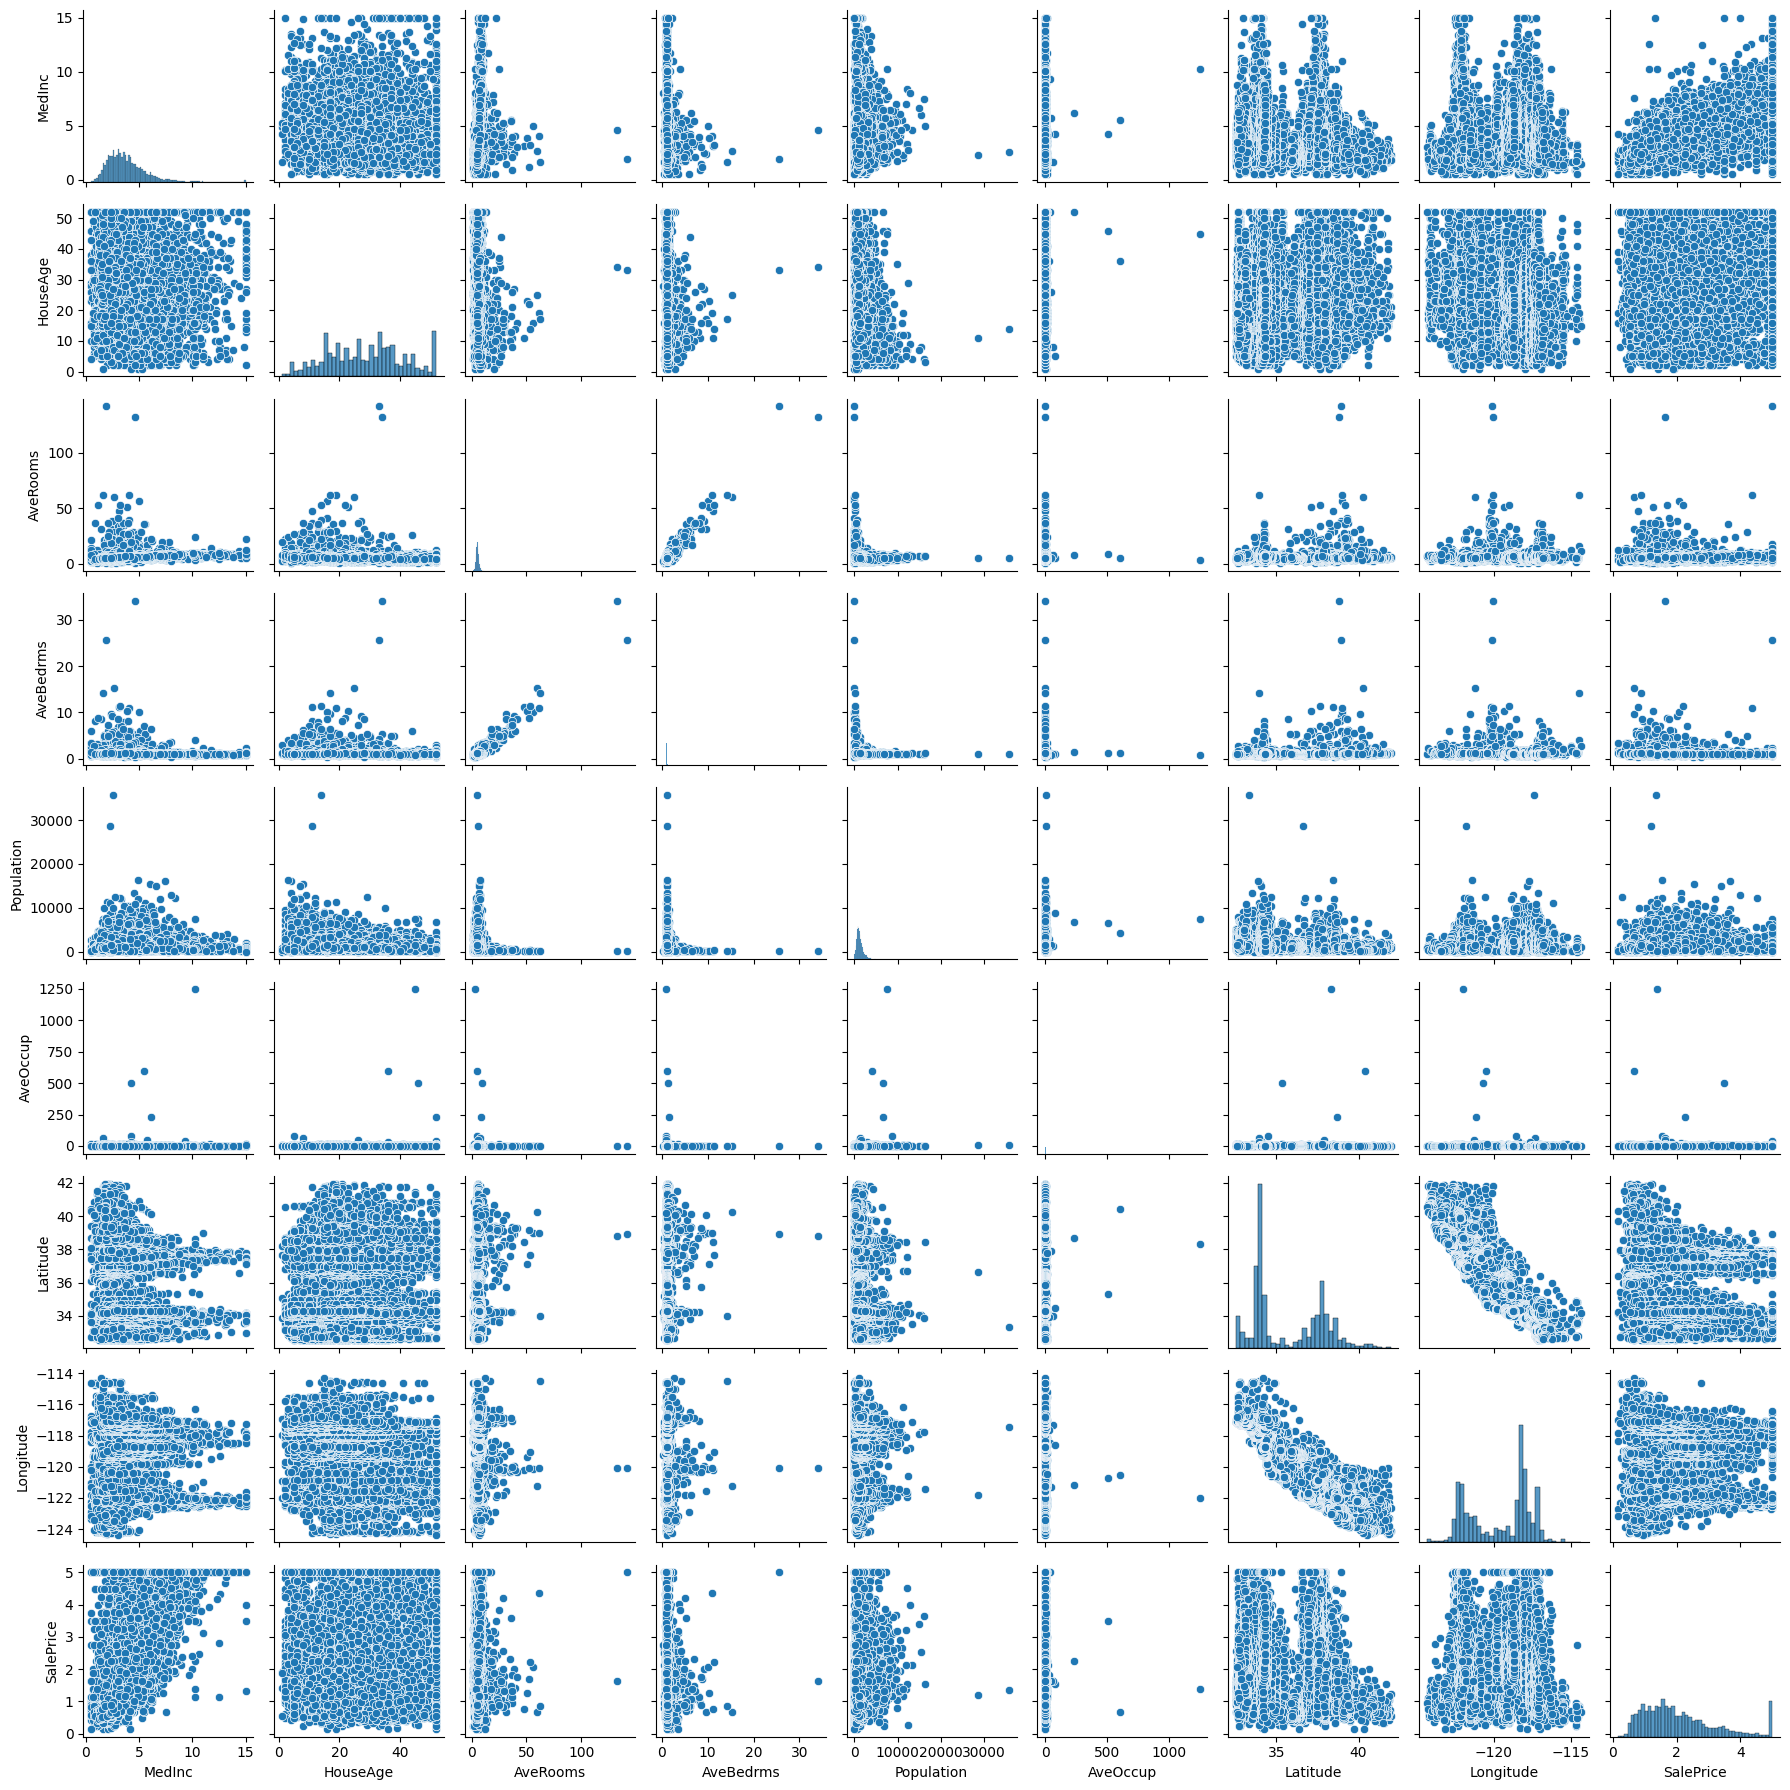

In [7]:
sns.pairplot(data, height = 2)
plt.tight_layout()

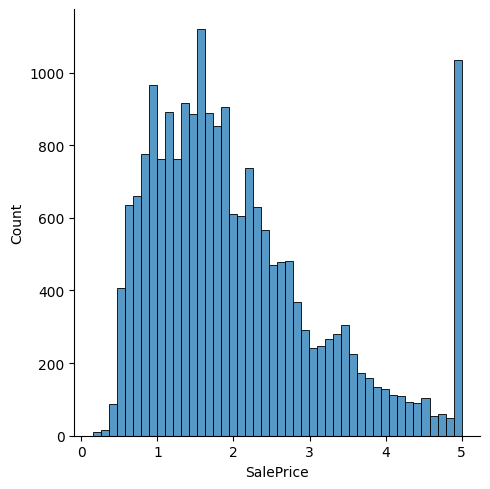

In [8]:
sns.displot(data['SalePrice'])

In [9]:
print("Skewness", data["SalePrice"].skew())

Skewness 0.9777632739098345


In [10]:
print("Kurtosis", data["SalePrice"].kurt())

Kurtosis 0.3278702429465876


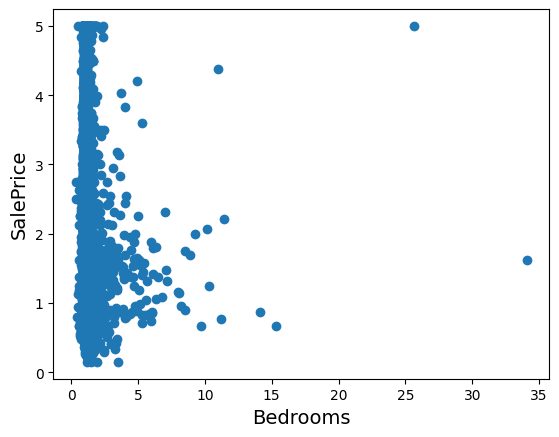

In [11]:
fig, ax = plt.subplots()
ax.scatter(x= data["AveBedrms"], y=data["SalePrice"])
plt.ylabel('SalePrice', fontsize=14)
plt.xlabel('Bedrooms', fontsize=14)
plt.show()

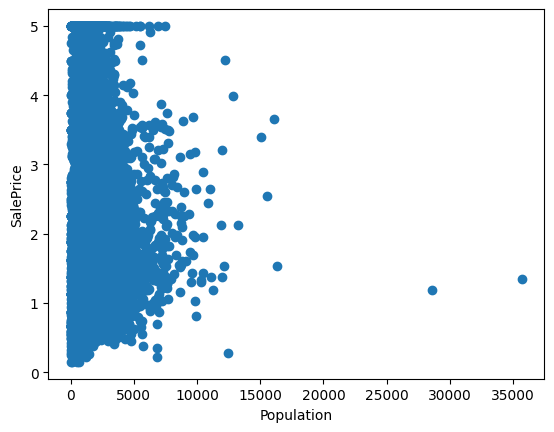

In [12]:
fig, ax = plt.subplots()
ax.scatter(x= data["Population"], y=data["SalePrice"])
plt.ylabel('SalePrice', fontsize=10)
plt.xlabel('Population', fontsize=10)
plt.show()


 mu = 2.07 and sigma= 1.15



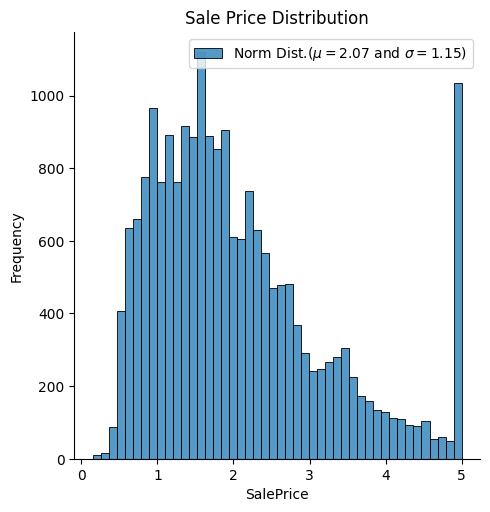

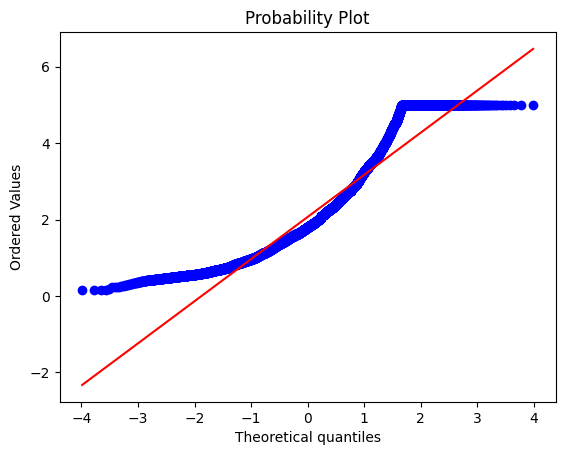

In [13]:
from scipy import stats
from scipy.stats import norm
sns.displot(data["SalePrice"])
(mu, sigma) = norm.fit(data['SalePrice'])
print("\n mu = {:.2f} and sigma= {:.2f}\n".format(mu, sigma))
plt.legend(["Norm Dist.($\mu= ${:.2f} and $\sigma = ${:.2f})".format(mu, sigma)], loc='best')
plt.ylabel("Frequency")
plt.title("Sale Price Distribution")

fig = plt.figure()
res = stats.probplot(data["SalePrice"], plot=plt)
plt.show()


 mu = 1.06 and sigma= 0.36



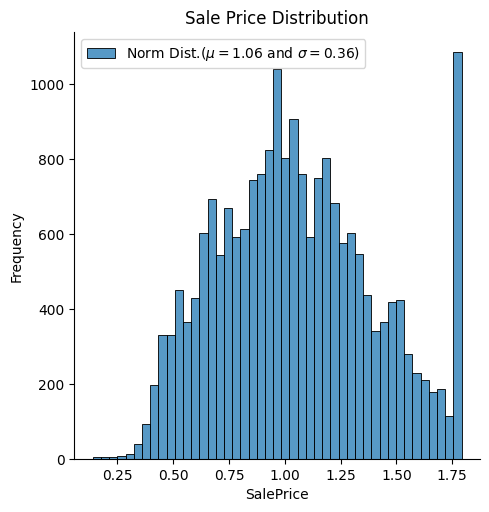

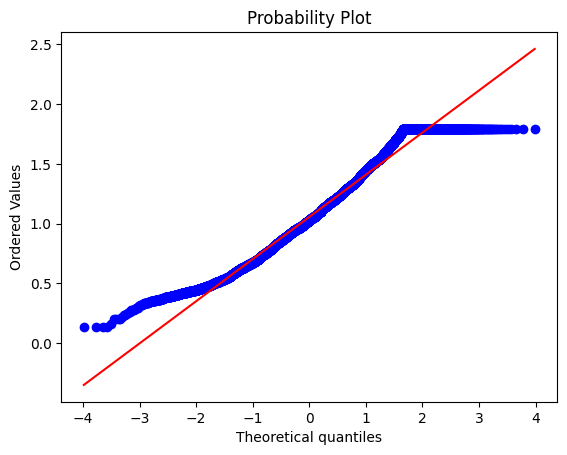

In [14]:
data["SalePrice"] = np.log1p(data["SalePrice"])
sns.displot(data["SalePrice"])
(mu, sigma) = norm.fit(data['SalePrice'])
print("\n mu = {:.2f} and sigma= {:.2f}\n".format(mu, sigma))
plt.legend(["Norm Dist.($\mu= ${:.2f} and $\sigma = ${:.2f})".format(mu, sigma)], loc='best')
plt.ylabel("Frequency")
plt.title("Sale Price Distribution")

fig = plt.figure()
res = stats.probplot(data["SalePrice"], plot=plt)
plt.show()

### Data Correlation

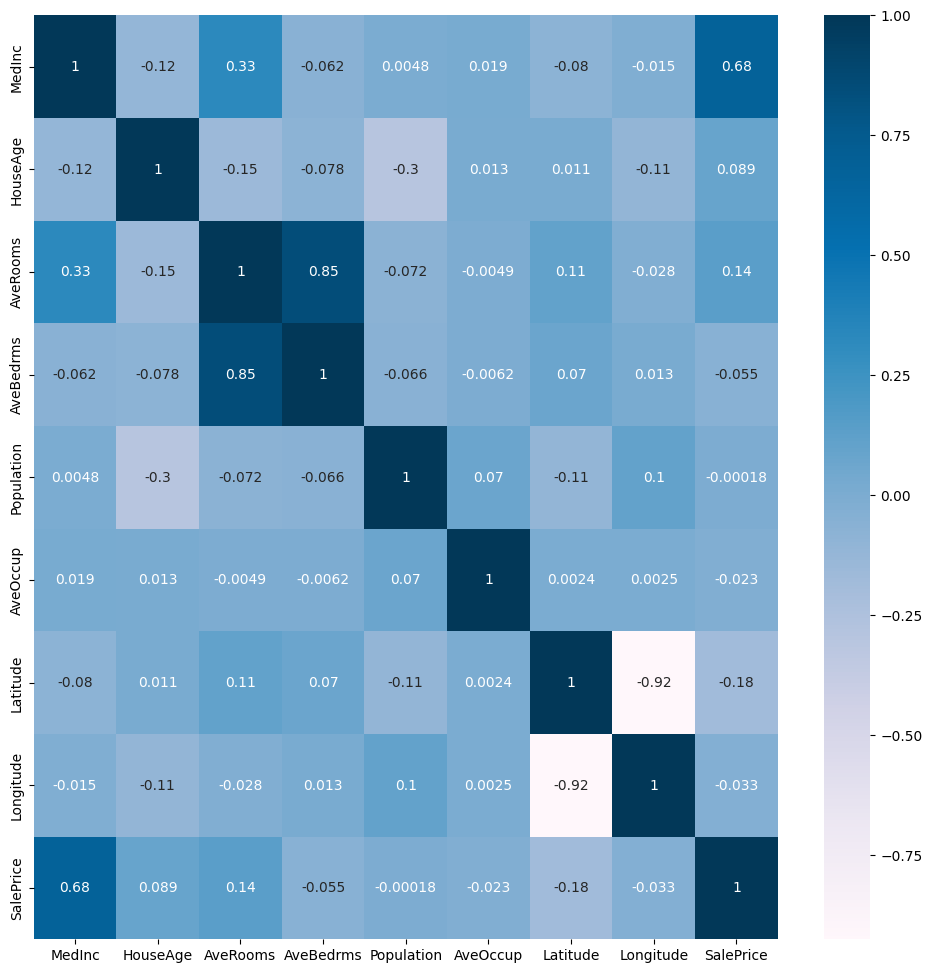

In [15]:
plt.figure(figsize = (12,12))
cor = data.corr()
sns.heatmap(cor, annot = True, cmap= plt.cm.PuBu)
plt.show()

In [16]:
cor_target=abs(cor["SalePrice"])
relevant_features= cor_target[cor_target > 0.05]
names=[index for index,value in relevant_features.items()]
names.remove("SalePrice")
print(names)
print(len(names))

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude']
5


### EDA of new_data
#### new_data is a subset of data

In [17]:
new_data = data[2000:10000]


 mu = 1.06 and sigma= 0.37



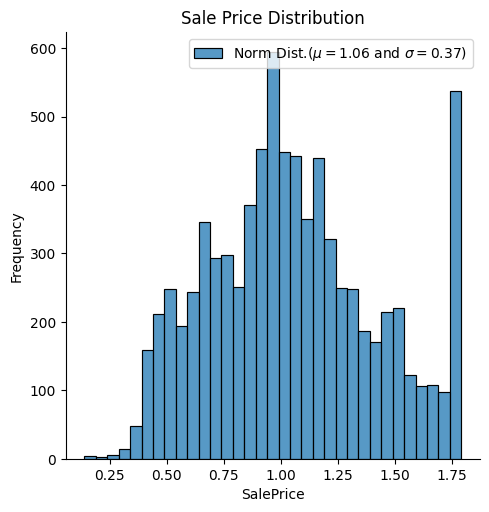

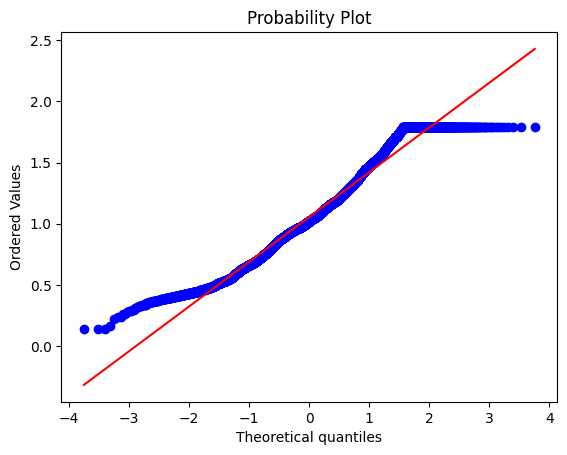

In [18]:
sns.displot(new_data["SalePrice"])
(mu, sigma) = norm.fit(new_data['SalePrice'])
print("\n mu = {:.2f} and sigma= {:.2f}\n".format(mu, sigma))
plt.legend(["Norm Dist.($\mu= ${:.2f} and $\sigma = ${:.2f})".format(mu, sigma)], loc='best')
plt.ylabel("Frequency")
plt.title("Sale Price Distribution")

fig = plt.figure()
res = stats.probplot(new_data["SalePrice"], plot=plt)
plt.show()


 mu = 0.70 and sigma= 0.18



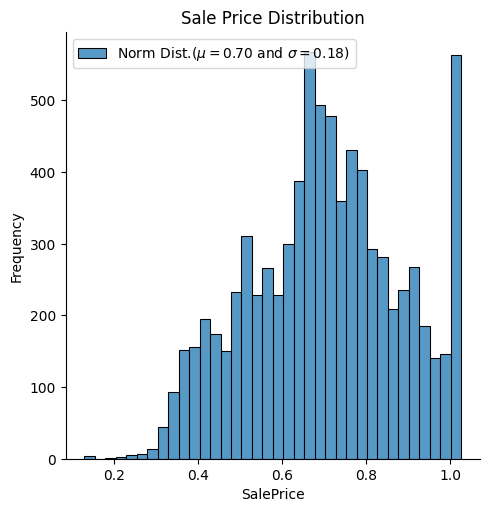

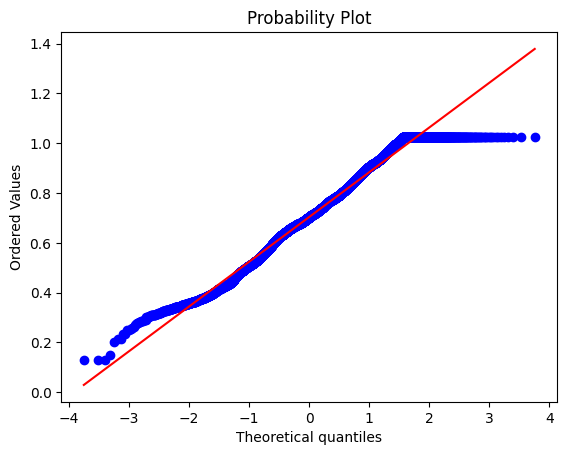

In [19]:
new_data = new_data.copy()
new_data["SalePrice"] = np.log1p(new_data["SalePrice"])
sns.displot(new_data["SalePrice"])
(mu, sigma) = norm.fit(new_data['SalePrice'])
print("\n mu = {:.2f} and sigma= {:.2f}\n".format(mu, sigma))
plt.legend(["Norm Dist.($\mu= ${:.2f} and $\sigma = ${:.2f})".format(mu, sigma)], loc='best')
plt.ylabel("Frequency")
plt.title("Sale Price Distribution")

fig = plt.figure()
res = stats.probplot(new_data["SalePrice"], plot=plt)
plt.show()

### Model Building

In [20]:
from sklearn.model_selection import train_test_split
x = new_data.drop("SalePrice", axis =1)
y = new_data["SalePrice"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 25)

In [21]:
print("test: ", x_test.shape, " " , y_test.shape)
print("train: ", x_train.shape, " " , y_train.shape)

test:  (1600, 8)   (1600,)
train:  (6400, 8)   (6400,)


In [22]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [23]:
predictions = lr.predict(x_test)
print(y_test)
print(predictions)

6673    0.714985
3186    0.538789
7522    0.490012
2460    0.444440
8398    0.703420
          ...   
8806    1.026673
8400    0.697118
3814    0.507815
8129    0.720788
8880    1.026673
Name: SalePrice, Length: 1600, dtype: float64
[0.71882471 0.63235434 0.62537643 ... 0.69500664 0.75241379 0.84577842]


In [27]:
print(y_test.iloc[10])
print(predictions[10])

0.42644614548035226
0.4932716553057155


In [28]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions) 
rmse = np.sqrt(mse)
print(rmse)

0.10977507944358234
